In [1]:
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drinks = Table().with_columns([
    'Drink', make_array('Mike Tea', 'Espresso', 'Coffee', 'Espresso'),
    'Cafe', make_array('Tea One', 'Nefeli', 'Nefeli', "Abe's"),
    'Price', make_array(4,2,3,2)
])
drinks

Drink,Cafe,Price
Mike Tea,Tea One,4
Espresso,Nefeli,2
Coffee,Nefeli,3
Espresso,Abe's,2


In [3]:
discounts = Table().with_columns(
        'Coupon', make_array(0.05, 0.5, 0.25),
        'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon,Location
0.05,Tea One
0.5,Nefeli
0.25,Tea One


In [4]:
cheapest = Table().with_columns(
        'Cafe', make_array('Nefeli', 'Tea One'),
        'Drink', make_array('Espresso', 'Milk Tea'),
        'Discounted Price', make_array(1, 3)
)
cheapest

Cafe,Drink,Discounted Price
Nefeli,Espresso,1
Tea One,Milk Tea,3


In [5]:
discounted_drink = drinks.join('Cafe', discounts, 'Location')
discounted_drink

Cafe,Drink,Price,Coupon
Nefeli,Espresso,2,0.5
Nefeli,Coffee,3,0.5
Tea One,Mike Tea,4,0.05
Tea One,Mike Tea,4,0.25


In [6]:
discounted_drink = discounted_drink.with_column('After discount', discounted_drink.column('Price') * (1-discounted_drink.column('Coupon')))
discounted_drink

Cafe,Drink,Price,Coupon,After discount
Nefeli,Espresso,2,0.5,1
Nefeli,Coffee,3,0.5,1.5
Tea One,Mike Tea,4,0.05,3.8
Tea One,Mike Tea,4,0.25,3


In [7]:
discounted_drink.drop(2, 3).sort('After discount').sort('Cafe', distinct=True)

Cafe,Drink,After discount
Nefeli,Espresso,1
Tea One,Mike Tea,3


In [8]:
trip = Table.read_table('../Data/trip.csv')
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [9]:
trip.labels

('Trip ID',
 'Duration',
 'Start Date',
 'Start Station',
 'Start Terminal',
 'End Date',
 'End Station',
 'End Terminal',
 'Bike #',
 'Subscriber Type',
 'Zip Code')

In [10]:
trip2 = trip.select(1,3,6,)
trip2 = trip2.drop(0).with_columns('Duration', trip.column('Duration'))
trip2

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [11]:
ans2 = trip2.group('End Station').sort('count', descending=True)
ans2

End Station,count
San Francisco Caltrain (Townsend at 4th),34810
San Francisco Caltrain 2 (330 Townsend),22523
Harry Bridges Plaza (Ferry Building),17810
2nd at Townsend,15463
Townsend at 7th,15422
Embarcadero at Sansome,15065
Market at Sansome,13916
Steuart at Market,13617
Temporary Transbay Terminal (Howard at Beale),12966
Powell Street BART,10239


In [12]:
ans2.column('End Station').item(0)

'San Francisco Caltrain (Townsend at 4th)'

In [13]:
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [14]:
trip3 = trip2.drop(0).where('Duration', are.below(1800)).group('End Station', np.average).where('Duration average', are.above(60*10))
trip3

End Station,Duration average
California Ave Caltrain Station,790.987
Embarcadero at Sansome,719.903
Embarcadero at Vallejo,648.303
Golden Gate at Polk,764.848
Grant Avenue at Columbus Avenue,697.467
Japantown,662.46
Market at 10th,672.479
Park at Olive,819.677
Powell at Post (Union Square),712.306
Redwood City Public Library,639.278


In [15]:
trip3 = trip3.where('Duration average', are.below(60*30)).sort('Duration average', descending=True).show(30)

End Station,Duration average
University and Emerson,992.52
Park at Olive,819.677
California Ave Caltrain Station,790.987
South Van Ness at Market,765.581
Golden Gate at Polk,764.848
Stanford in Redwood City,762.195
San Francisco City Hall,738.906
Embarcadero at Sansome,719.903
Rengstorff Avenue / California Street,714.224
Powell at Post (Union Square),712.306


In [16]:
trip3 

In [17]:
t1 = np.arange(5)

In [18]:
t1

array([0, 1, 2, 3, 4])

In [19]:
t1 > 2

array([False, False, False,  True,  True])

In [20]:
t1[t1>2]

array([3, 4])

In [21]:
full_census_table = Table.read_table('../Data/nc-est2015-agesex-res.csv')
partial = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [22]:
us_pop.where(us_pop.column('2015')/us_pop.column('2010') > 1.5)

SEX,AGE,2010,2015
1,94,43827,68135
1,95,31736,48015
1,97,14775,23092
1,98,9505,14719
1,99,6104,9577
1,100,9352,15088


In [23]:
trip = Table.read_table('../Data/trip.csv').where('Duration', are.below(1800)).select(3,6,1)
trip

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [24]:
trip = trip.relabeled('Start Station', 'Start').relabeled('End Station', 'End')
trip

Start,End,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [25]:
np.average(trip.where(trip.column('Start')==trip.column('End')).column('Duration'))

758.612993783838

In [26]:
two_groups = make_array('treatment', 'control')

In [27]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'control', 'treatment', 'control',
       'treatment', 'control', 'control', 'treatment', 'treatment'],
      dtype='<U9')

In [28]:
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['treatment', 'treatment', 'treatment', 'control', 'treatment',
       'control', 'treatment', 'control', 'treatment', 'treatment'],
      dtype='<U9')

In [29]:
sum(outcomes=='treatment')

7

In [30]:
np.count_nonzero(outcomes=='treatment')

7

In [32]:
coin = make_array('head', 'tail')

In [33]:
num_heads = make_array(sum(np.random.choice(coin, 100)=='head'))
num_heads

array([48])

In [41]:
num_heads = make_array()
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100)=='head'))

In [42]:
num_heads

array([51., 53., 46., ..., 50., 49., 62.])

In [43]:
sum(num_heads)/len(num_heads)

49.9522

In [44]:
min(num_heads), max(num_heads)

(30.0, 68.0)

In [45]:
sum(num_heads>55)

1355

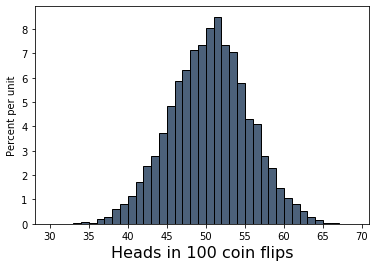

In [46]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30,70,1))

In [48]:
most = t.group(0).where(0, are.between(40,60))
most

Heads in 100 coin flips,count
40,114
41,172
42,238
43,280
44,374
45,486
46,587
47,632
48,716
49,734


In [49]:
sum(most.column('count'))/t.num_rows

0.9502